In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open(os.path.join('harm_power_data', 'dataslot_2', 'all_matches'), 'rb') as fp:
        grid_data = pickle.load(fp)

# Find min and max
for param in list(grid_data.keys()):
    for key in list(grid_data[param].keys()):
        if key not in ['params', 'vary_param', 'param_vals'] and 'phase' not in key:
            grid_data[param][f'{key}_max'] = np.nanmax(np.array(grid_data[param][key]), axis=1)
            grid_data[param][f'{key}_min'] = np.nanmin(np.array(grid_data[param][key]), axis=1)

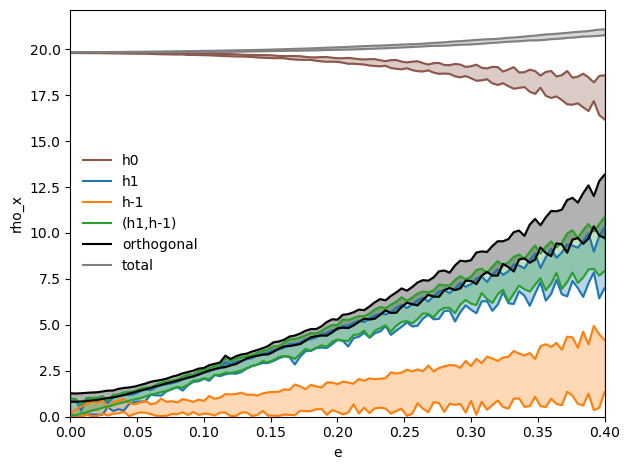

In [61]:
param = list(grid_data.keys())[0]

# Plot for each chirp mass
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h0_max'], c='C5', label='h0')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h0_min'], c='C5')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h0_min'], 
                 grid_data[param]['h0_max'], color='C5', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_max'], c='C0', label='h1')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_min'], c='C0')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h1_min'], 
                 grid_data[param]['h1_max'], color='C0', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h-1_max'], c='C1', label='h-1')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h-1_min'], c='C1')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h-1_min'], 
                 grid_data[param]['h-1_max'], color='C1', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_max'], c='C2', label='(h1,h-1)')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_min'], c='C2')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_min'], 
                 grid_data[param]['h1_h-1_max'], color='C2', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_max'], c='k', label='orthogonal')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_min'], c='k')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_min'], 
                 grid_data[param]['ortho_SNR_max'], color='k', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['total_SNR_max'], c='gray', label='total')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['total_SNR_min'], c='gray')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['total_SNR_min'], 
                 grid_data[param]['total_SNR_max'], color='gray', alpha=0.3)
plt.legend(frameon=False)
plt.xlim(0,0.4)
plt.ylim(0,)
plt.xlabel(grid_data[param]['vary_param'])
plt.ylabel('rho_x')
plt.tight_layout()
plt.savefig('Figures/harm_power_e.png', dpi=450)

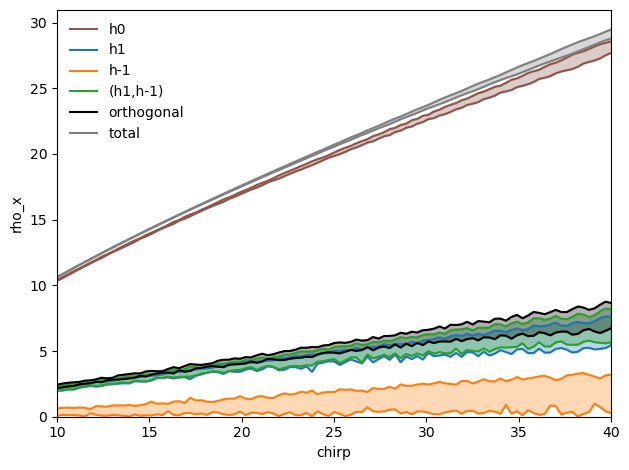

In [62]:
param = list(grid_data.keys())[1]

# Plot for each chirp mass
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h0_max'], c='C5', label='h0')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h0_min'], c='C5')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h0_min'], 
                 grid_data[param]['h0_max'], color='C5', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_max'], c='C0', label='h1')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_min'], c='C0')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h1_min'], 
                 grid_data[param]['h1_max'], color='C0', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h-1_max'], c='C1', label='h-1')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h-1_min'], c='C1')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h-1_min'], 
                 grid_data[param]['h-1_max'], color='C1', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_max'], c='C2', label='(h1,h-1)')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_min'], c='C2')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_min'], 
                 grid_data[param]['h1_h-1_max'], color='C2', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_max'], c='k', label='orthogonal')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_min'], c='k')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_min'], 
                 grid_data[param]['ortho_SNR_max'], color='k', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['total_SNR_max'], c='gray', label='total')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['total_SNR_min'], c='gray')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['total_SNR_min'], 
                 grid_data[param]['total_SNR_max'], color='gray', alpha=0.3)
plt.legend(frameon=False)
plt.xlim(10,40)
plt.ylim(0,)
plt.xlabel(grid_data[param]['vary_param'])
plt.ylabel('rho_x')
plt.tight_layout()
plt.savefig('Figures/harm_power_chirp.png', dpi=450)

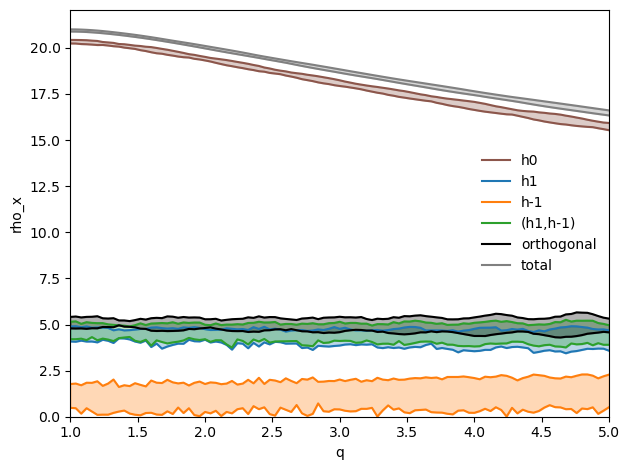

In [63]:
param = list(grid_data.keys())[2]

# Plot for each chirp mass
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h0_max'], c='C5', label='h0')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h0_min'], c='C5')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h0_min'], 
                 grid_data[param]['h0_max'], color='C5', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_max'], c='C0', label='h1')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_min'], c='C0')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h1_min'], 
                 grid_data[param]['h1_max'], color='C0', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h-1_max'], c='C1', label='h-1')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h-1_min'], c='C1')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h-1_min'], 
                 grid_data[param]['h-1_max'], color='C1', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_max'], c='C2', label='(h1,h-1)')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_min'], c='C2')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_min'], 
                 grid_data[param]['h1_h-1_max'], color='C2', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_max'], c='k', label='orthogonal')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_min'], c='k')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_min'], 
                 grid_data[param]['ortho_SNR_max'], color='k', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['total_SNR_max'], c='gray', label='total')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['total_SNR_min'], c='gray')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['total_SNR_min'], 
                 grid_data[param]['total_SNR_max'], color='gray', alpha=0.3)
plt.legend(frameon=False)
plt.xlim(1,5)
plt.ylim(0,)
plt.xlabel(grid_data[param]['vary_param'])
plt.ylabel('rho_x')
plt.tight_layout()
plt.savefig('Figures/harm_power_q.png', dpi=450)

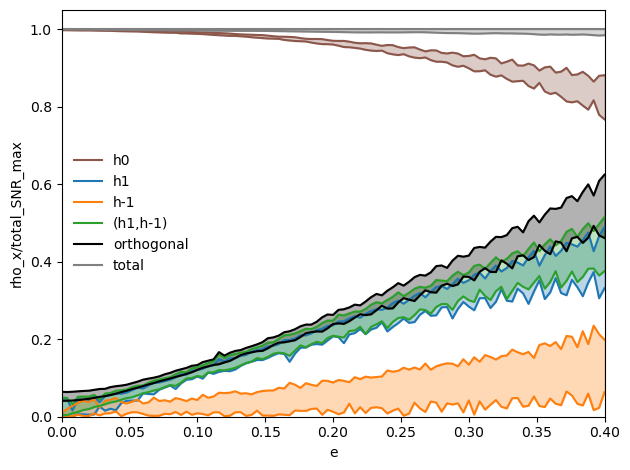

In [67]:
param = list(grid_data.keys())[0]

# Plot for each chirp mass
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h0_max']/grid_data[param]['total_SNR_max'], c='C5', label='h0')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h0_min']/grid_data[param]['total_SNR_max'], c='C5')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h0_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h0_max']/grid_data[param]['total_SNR_max'], color='C5', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_max']/grid_data[param]['total_SNR_max'], c='C0', label='h1')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_min']/grid_data[param]['total_SNR_max'], c='C0')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h1_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h1_max']/grid_data[param]['total_SNR_max'], color='C0', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h-1_max']/grid_data[param]['total_SNR_max'], c='C1', label='h-1')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h-1_min']/grid_data[param]['total_SNR_max'], c='C1')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h-1_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h-1_max']/grid_data[param]['total_SNR_max'], color='C1', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_max']/grid_data[param]['total_SNR_max'], c='C2', label='(h1,h-1)')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_min']/grid_data[param]['total_SNR_max'], c='C2')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h1_h-1_max']/grid_data[param]['total_SNR_max'], color='C2', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_max']/grid_data[param]['total_SNR_max'], c='k', label='orthogonal')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_min']/grid_data[param]['total_SNR_max'], c='k')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['ortho_SNR_max']/grid_data[param]['total_SNR_max'], color='k', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['total_SNR_max']/grid_data[param]['total_SNR_max'], c='gray', label='total')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['total_SNR_min']/grid_data[param]['total_SNR_max'], c='gray')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['total_SNR_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['total_SNR_max']/grid_data[param]['total_SNR_max'], color='gray', alpha=0.3)
plt.legend(frameon=False)
plt.xlim(0,0.4)
plt.ylim(0,)
plt.xlabel(grid_data[param]['vary_param'])
plt.ylabel('rho_x/total_SNR_max')
plt.tight_layout()
plt.savefig('Figures/harm_power_e_norm.png', dpi=450)

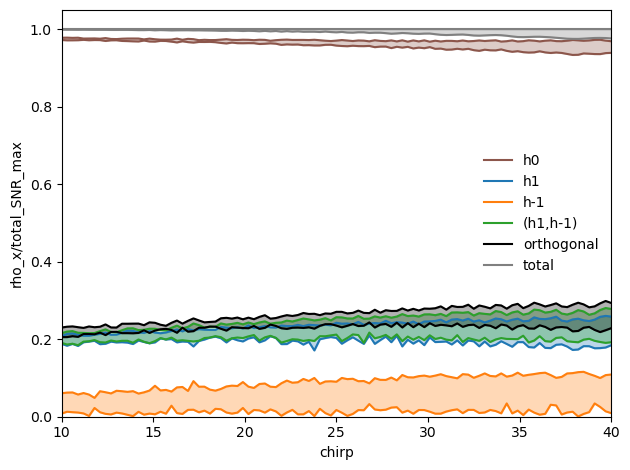

In [68]:
param = list(grid_data.keys())[1]

# Plot for each chirp mass
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h0_max']/grid_data[param]['total_SNR_max'], c='C5', label='h0')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h0_min']/grid_data[param]['total_SNR_max'], c='C5')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h0_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h0_max']/grid_data[param]['total_SNR_max'], color='C5', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_max']/grid_data[param]['total_SNR_max'], c='C0', label='h1')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_min']/grid_data[param]['total_SNR_max'], c='C0')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h1_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h1_max']/grid_data[param]['total_SNR_max'], color='C0', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h-1_max']/grid_data[param]['total_SNR_max'], c='C1', label='h-1')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h-1_min']/grid_data[param]['total_SNR_max'], c='C1')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h-1_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h-1_max']/grid_data[param]['total_SNR_max'], color='C1', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_max']/grid_data[param]['total_SNR_max'], c='C2', label='(h1,h-1)')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_min']/grid_data[param]['total_SNR_max'], c='C2')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h1_h-1_max']/grid_data[param]['total_SNR_max'], color='C2', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_max']/grid_data[param]['total_SNR_max'], c='k', label='orthogonal')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_min']/grid_data[param]['total_SNR_max'], c='k')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['ortho_SNR_max']/grid_data[param]['total_SNR_max'], color='k', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['total_SNR_max']/grid_data[param]['total_SNR_max'], c='gray', label='total')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['total_SNR_min']/grid_data[param]['total_SNR_max'], c='gray')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['total_SNR_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['total_SNR_max']/grid_data[param]['total_SNR_max'], color='gray', alpha=0.3)
plt.legend(frameon=False)
plt.xlim(10,40)
plt.ylim(0,)
plt.xlabel(grid_data[param]['vary_param'])
plt.ylabel('rho_x/total_SNR_max')
plt.tight_layout()
plt.savefig('Figures/harm_power_chirp_norm.png', dpi=450)

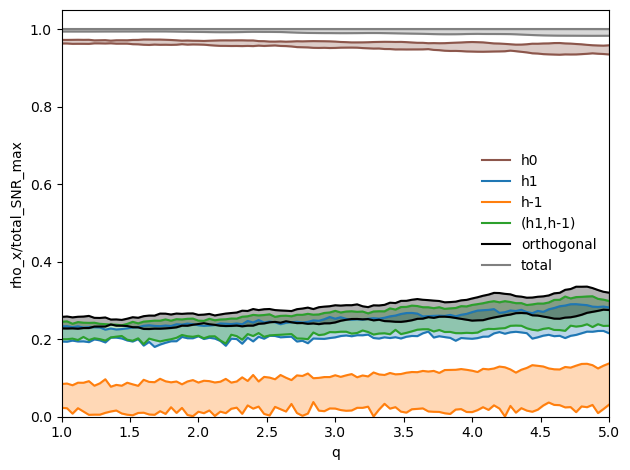

In [69]:
param = list(grid_data.keys())[2]

# Plot for each chirp mass
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h0_max']/grid_data[param]['total_SNR_max'], c='C5', label='h0')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h0_min']/grid_data[param]['total_SNR_max'], c='C5')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h0_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h0_max']/grid_data[param]['total_SNR_max'], color='C5', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_max']/grid_data[param]['total_SNR_max'], c='C0', label='h1')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_min']/grid_data[param]['total_SNR_max'], c='C0')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h1_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h1_max']/grid_data[param]['total_SNR_max'], color='C0', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h-1_max']/grid_data[param]['total_SNR_max'], c='C1', label='h-1')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h-1_min']/grid_data[param]['total_SNR_max'], c='C1')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h-1_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h-1_max']/grid_data[param]['total_SNR_max'], color='C1', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_max']/grid_data[param]['total_SNR_max'], c='C2', label='(h1,h-1)')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_min']/grid_data[param]['total_SNR_max'], c='C2')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h1_h-1_max']/grid_data[param]['total_SNR_max'], color='C2', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_max']/grid_data[param]['total_SNR_max'], c='k', label='orthogonal')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_min']/grid_data[param]['total_SNR_max'], c='k')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['ortho_SNR_max']/grid_data[param]['total_SNR_max'], color='k', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['total_SNR_max']/grid_data[param]['total_SNR_max'], c='gray', label='total')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['total_SNR_min']/grid_data[param]['total_SNR_max'], c='gray')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['total_SNR_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['total_SNR_max']/grid_data[param]['total_SNR_max'], color='gray', alpha=0.3)
plt.legend(frameon=False)
plt.xlim(1,5)
plt.ylim(0,)
plt.xlabel(grid_data[param]['vary_param'])
plt.ylabel('rho_x/total_SNR_max')
plt.tight_layout()
plt.savefig('Figures/harm_power_q_norm.png', dpi=450)